### Linear regression with Scikit-Learn

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For example, predicting the price of stock is a regression problem whereas predicting a spam/ham email is a classification problem.

Here we will study linear regression implementation using Python Scikit-Learn library. We will start with simple linear regression involving two variables and then we will consider multiple linear regression involving multiple variables.


### Import Libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


### Dataset

The dataset is publicly available and can be downloaded from the following link

https://drive.google.com/openid=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

In [4]:
# load the data set 

data_df = pd.read_csv('/Users/home/Desktop/CSTU/student_scores.csv')  

Now let's explore the dataset a bit. 

In [5]:
data_df.shape

(25, 2)

In [6]:
data_df.columns

Index(['Hours', 'Scores'], dtype='object')

This means that our dataset has 25 rows and 2 columns. Let's take a look at what our dataset actually looks like. 

In [7]:
data_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


To see statistical details of the dataset

In [8]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


And finally, let's plot out data and see if we can manually find any relationship between the data. 

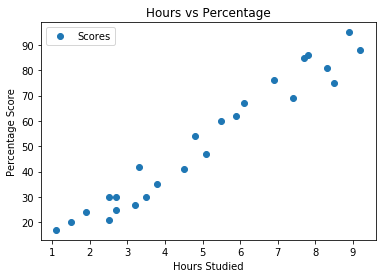

In [8]:
data_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the gaprh, we can clearly see that there is a positive linear relationship between the two variables.

Next step is to divide the data into input (independent variable) and output variables (dependent variables) whose values are to be predicted. 


In [10]:
X = data_df.iloc[:,0]    # X = data_df.Hours
y = data_df.iloc[:,1]    # y = data_df.Scores

In [11]:
print('X: ', X.shape)

X:  (25,)


In [12]:
print('y: ', y.shape)

y:  (25,)


Next step is to split the data into training and test sets. we are splitting the data into 80% and 20% into training and testing respectively.  

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

To make sure that the data has been divided as we are expecting

In [19]:
print('X_train: ', X_train.shape)
print('\n')
print('X_test: ', X_test.shape)
print('\n')
print('y_train: ', y_train.shape)
print('\n')
print('y_test: ', y_test.shape)


X_train:  (20, 1)


X_test:  (5, 1)


y_train:  (20, 1)


y_test:  (5, 1)


Now our data is ready. Finally we want to fit the model.


In [15]:
from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. See the intercept and slope

In [16]:
# Intercept
print(linear_model.intercept_)

[2.69538892]


The intercept is approximately 2.69538892

In [17]:
# Slope 

print(linear_model.coef_) 

[[9.60171878]]


This means that for every one unit of change in hours studied, the change in the score is about 9.60%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.60% in the score achieved by the student previously.


In [18]:
# R2 value
linear_model.score(X_train, y_train)

0.9493255692526655

Once we have fitted the model we want to see how good it is. 

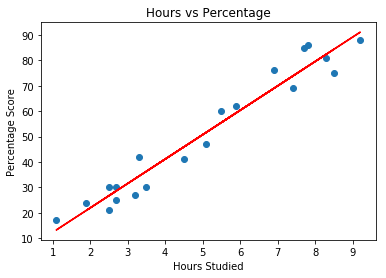

In [18]:
plt.scatter(X_train, y_train) 
plt.plot(X_train, linear_model.predict(X_train), color = 'red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Once we have trained our algorithm, it's time to make predictions. 

In [20]:
y_pred = (linear_model.predict(X_test))


Let us see the test data and predicted line.

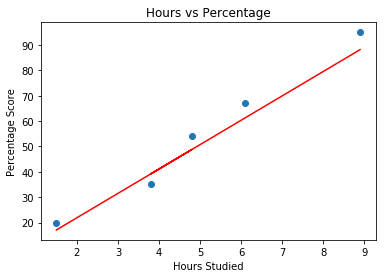

In [21]:
plt.scatter(X_test, y_test) 
plt.plot(X_test, y_pred, color = 'red')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Compare the actual output values for X_test with the predicted values, 

# Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. For regression algorithms, three evaluation metrics are commonly used: 

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

\begin{equation}
\frac {1} {n} \sum_{i=1}^n |y_{actual} - y_{pred}|
\end{equation}

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

\begin{equation}
\frac {1} {n}  \sum_{i=1}^n | y_{actual} - y_{pred} |^2
\end{equation}


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

\begin{equation}
\sqrt{\frac {1} {n} \sum_{i=1}^n | y_{actual} - y_{pred} |^2}
\end{equation}



Fotunately Scikit-Learn library comes with pre-built functions to calculate these values


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.9767509236804015
Mean Squared Error: 26.582796488881087
Root Mean Squared Error: 5.15585070467339


You can see that the value of root mean squared error is 5.15, which is about 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job

#### Residual Plots
Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing some thing. Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.



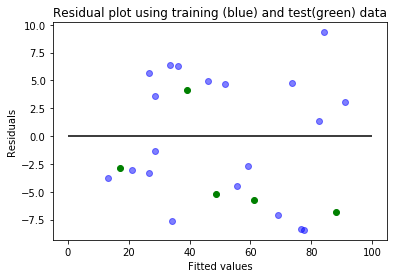

In [22]:
plt.scatter(linear_model.predict(X_train), linear_model.predict(X_train)-y_train, c= 'b', alpha = 0.5)
plt.scatter(linear_model.predict(X_test), linear_model.predict(X_test)-y_test, c= 'g')
plt.hlines(y = 0, xmin = 0, xmax = 100)
plt.title('Residual plot using training (blue) and test(green) data')
plt.ylabel('Residuals')
plt.xlabel('Fitted values')